# Introdução à Modelagem Preditiva com Árvores de Decisão
Este notebook apresenta, de forma simples e visual, como aplicar uma **árvore de decisão** para prever o cancelamento de clientes, usando a base de dados TECAL.

Vamos seguir os seguintes passos:
1. Importar a base de dados
2. Explorar rapidamente os dados
3. Separar os dados em treino e teste
4. Ajustar um modelo de árvore de decisão
5. Visualizar a árvore e interpretar os resultados


In [15]:
# 1. Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [16]:
# 2. Leitura da base TECAL
df = pd.read_excel("TECAL.xlsx")
df = df.drop(columns=df.columns[0])  # Remove a coluna de ID
df.head()

,idade,linhas,temp_cli,renda,fatura,temp_rsd,local,tvcabo,debaut,cancel
0,51,3,26,5320,543,7.3,A,sim,nao,nao
1,36,2,16,5620,482,4.5,A,sim,nao,nao
2,35,1,15,4860,593,4.8,A,nao,nao,nao
3,44,1,16,5400,646,6.3,C,sim,sim,sim
4,40,1,22,6590,1184,6.2,C,sim,nao,nao


In [19]:
# 3. Divisão entre treino e teste (60% treino, 40% teste)
X = df.drop(columns='cancel')
y = df['cancel']
from sklearn.model_selection import train_test_split
X = pd.get_dummies(X, columns=['local', 'tvcabo', 'debaut'])

# Divisão após aplicar o get_dummies
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.4, random_state=42)



In [20]:
# 4. Criação e ajuste da árvore de decisão
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

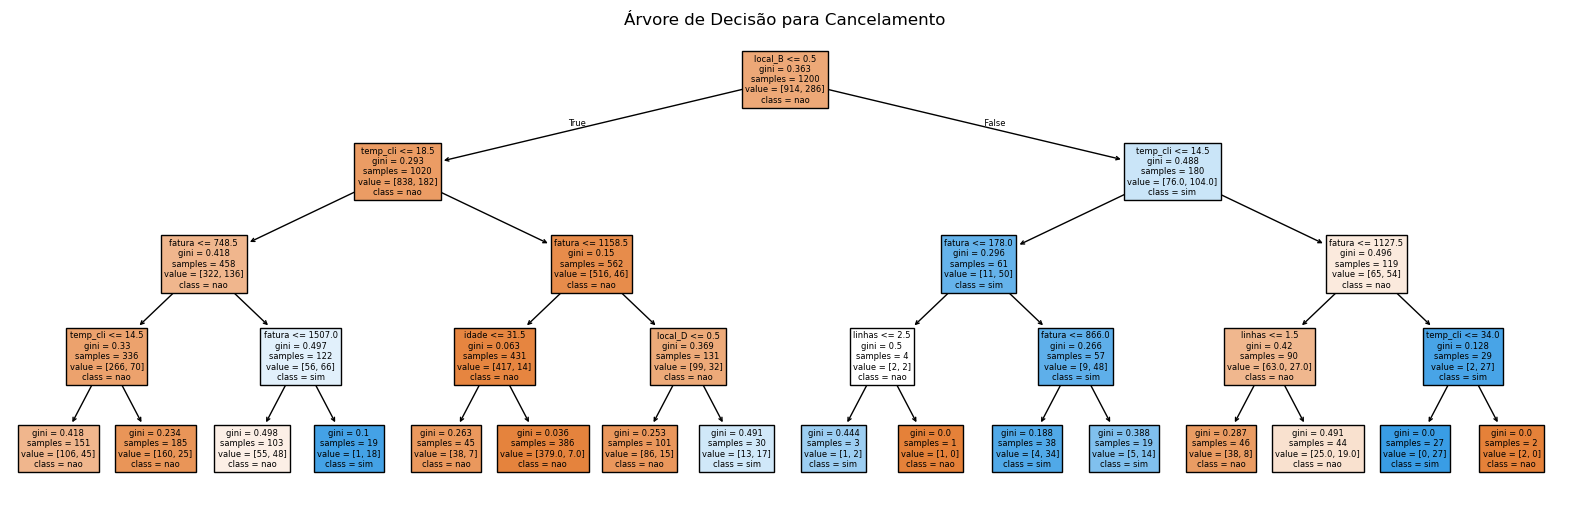

In [21]:
# 5. Visualização da árvore gerada
plt.figure(figsize=(20, 6))
plot_tree(modelo_arvore, feature_names=X.columns, class_names=modelo_arvore.classes_, filled=True)
plt.title("Árvore de Decisão para Cancelamento")
plt.show()

Acurácia no teste: 0.77


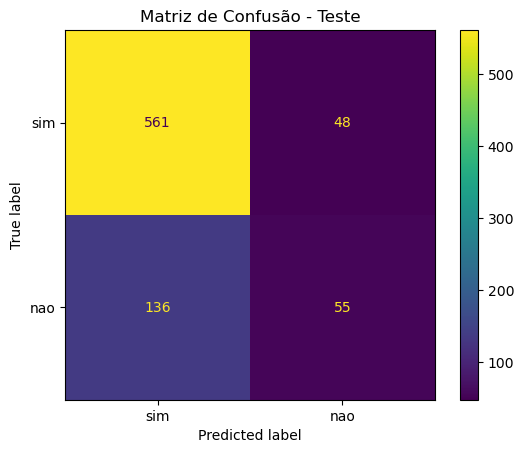

In [23]:
# 6. Avaliação da acurácia no conjunto de teste
y_pred = modelo_arvore.predict(X_test)
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['sim','nao'])
plt.title("Matriz de Confusão - Teste")
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Recriação do modelo com pesos balanceados
modelo_arvore_balanceado = DecisionTreeClassifier(max_depth=4, class_weight='balanced', random_state=42)
modelo_arvore_balanceado.fit(X_train, y_train)

# Previsão no conjunto de teste
y_pred_balanceado = modelo_arvore_balanceado.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred_balanceado))
print("Precisão (classe 'sim'):", precision_score(y_test, y_pred_balanceado, pos_label="sim"))
print("Recall (classe 'sim'):", recall_score(y_test, y_pred_balanceado, pos_label="sim"))
print("F1-Score (classe 'sim'):", f1_score(y_test, y_pred_balanceado, pos_label="sim"))
print("\nRelatório completo:\n")
print(classification_report(y_test, y_pred_balanceado, target_names=["sim", "nao"]))


Acurácia: 0.7025
Precisão (classe 'sim'): 0.4294294294294294
Recall (classe 'sim'): 0.7486910994764397
F1-Score (classe 'sim'): 0.5458015267175572

Relatório completo:

              precision    recall  f1-score   support

         sim       0.90      0.69      0.78       609
         nao       0.43      0.75      0.55       191

    accuracy                           0.70       800
   macro avg       0.66      0.72      0.66       800
weighted avg       0.79      0.70      0.72       800



🎯 **Conclusão:**
Este exemplo mostrou como é possível usar uma árvore de decisão simples para prever o comportamento de clientes. Árvores são uma ótima forma de começar a aprender sobre modelos preditivos, pois sua estrutura é fácil de visualizar e interpretar.